In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [62]:
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels) , (test_images, test_labels) = cifar10.load_data()

In [63]:
train_images.shape

(50000, 32, 32, 3)

In [64]:
test_images.shape

(10000, 32, 32, 3)

In [31]:
"""train_images = tf.image.rgb_to_grayscale(train_images)
train_images.shape"""


TensorShape([50000, 32, 32, 1])

In [65]:
len(train_labels)

50000

In [66]:
len(test_labels)

10000

In [67]:
# Sınıf etiketlerini tanımlama
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

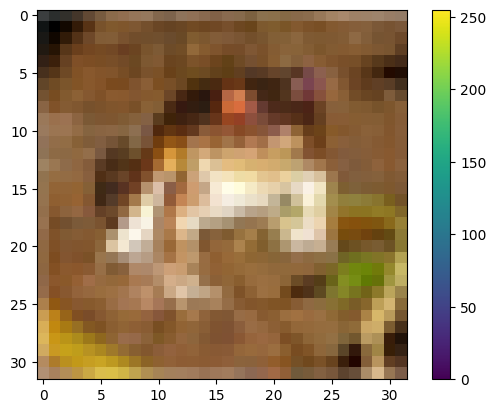

In [68]:
def plot_image():
  plt.figure()
  plt.imshow(train_images[0])
  plt.colorbar() # renk sayılarını gösteren bar
  plt.grid(False)
  plt.show()
plot_image()

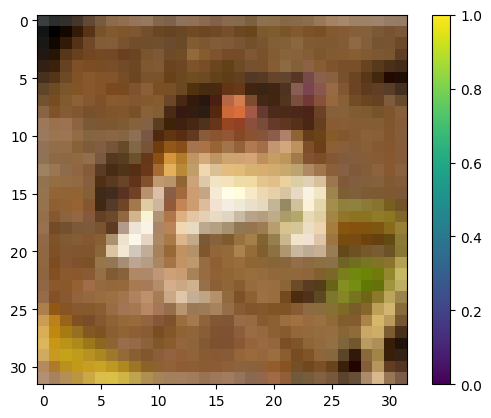

In [69]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plot_image()

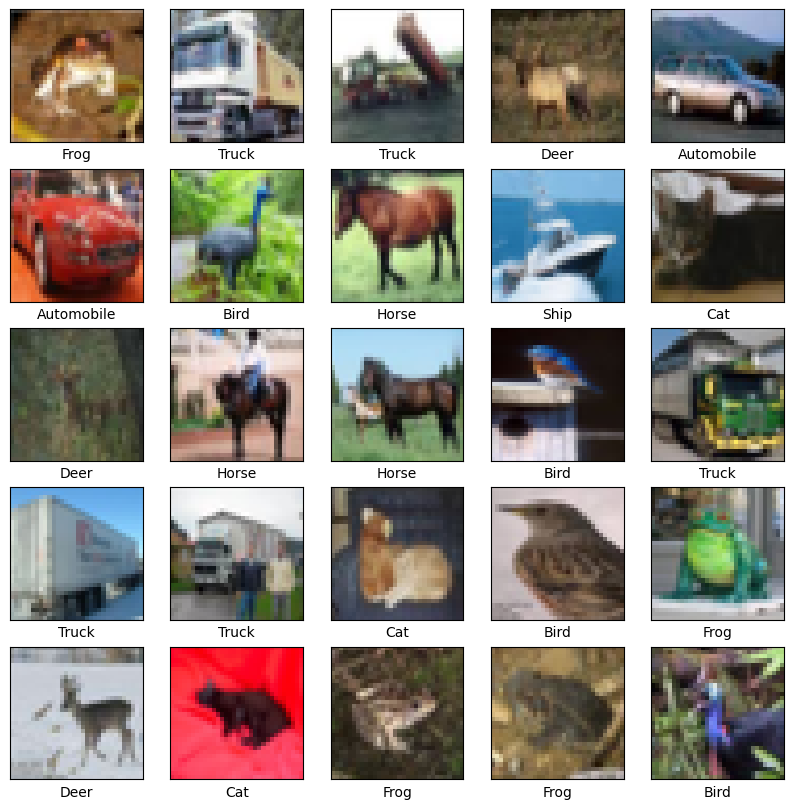

In [70]:
# Veri setindeki birkaç örnek görüntüyü görselleştirme
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [71]:
test_labels.ndim

2

In [72]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [109]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # Dropout katmanı eklendi
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout katmanı eklendi
    tf.keras.layers.Dense(10)
])

In [110]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [111]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6086 - accuracy: 0.4085
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2683 - accuracy: 0.5468
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1169 - accuracy: 0.6035
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0199 - accuracy: 0.6416
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9537 - accuracy: 0.6644
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8985 - accuracy: 0.6840
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8497 - accuracy: 0.7030
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8214 - accuracy: 0.7109
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7826 - accuracy: 0.7239
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.755

`Conv2D Katmanı:` İlk katman olarak, 32 filtreli 3x3 boyutunda bir evrişim katmanı (Convolutional Layer) tanımlanmıştır. Giriş olarak 32x32 boyutunda ve 3 kanallı (RGB) görüntüler kabul edilir. Aktivasyon fonksiyonu olarak ReLU (Rectified Linear Unit) kullanılmıştır. Bu katman, görüntüdeki özellikleri çıkarmak için evrişim işlemini gerçekleştirir.

`MaxPooling2D Katmanı:` İlk evrişim katmanının çıkışını alır ve her 2x2 piksel bloğunun en büyük değerini alarak boyutunu yarıya indiren bir Max Pooling katmanı uygular. Bu işlem, modelin özelliklerin yerel konumunu daha iyi öğrenmesine ve hesaplama yükünü azaltmasına yardımcı olur.

`Conv2D Katmanı:` İkinci bir evrişim katmanı tanımlanmıştır. Bu katman, daha karmaşık özellikleri öğrenmek için daha fazla filtre kullanır.

`MaxPooling2D Katmanı:` İkinci evrişim katmanının çıkışını alır ve tekrar Max Pooling uygular.

`Conv2D Katmanı:` Üçüncü bir evrişim katmanı tanımlanmıştır. Aynı şekilde, daha da karmaşık özelliklerin öğrenilmesine yardımcı olur.

`Flatten Katmanı:` Evrişim katmanlarının çıktısını düzleştirir. Bu işlem, bir diziye dönüştürerek, ardışık tam bağlantılı (fully connected) katmanlara (Dense layer) giriş olarak verebilir.

`Dense Katmanı:` 128 nöronlu bir gizli tam bağlantılı (fully connected) katman. Aktivasyon fonksiyonu olarak ReLU kullanılmıştır.

`Dense Katmanı:` 10 nöronlu bir çıkış katmanı. CIFAR-10 veri setindeki 10 sınıfı temsil eder. Bu katmanda her bir sınıf için bir nöron vardır. Sınıflandırma problemlerinde tipik olarak çıkış katmanında softmax
aktivasyon fonksiyonu kullanılır, ancak kodda belirtilmemiştir. Bu kod, çıktıları direkt olarak kullanır (from_logits=True ile belirtilir) ve bu nedenle bir sonraki adımda doğrudan çıkışlara softmax uygulanması gerekebilir.

### SONUÇ:

Sequential kısmında birkaç farklı yöntem denenmiştir.

1- Çok temel flatten ve 2 dense eklendiğinde 64 lü 38 accuracy alındı.

2- 64 olan 128 çıkarılıp denendi ve accuracy 45-50 arasına çıktı.

3- Şu anki mevcut sequentialdaki gibi bir model eklendi sadece 64 yerine 128 -> 75 accucary alındı

4- 64 yerine Dense kısmında 128 yapılıp denendi ve 83 accucary alındı
--> Boyle yapınca test verisi ile karsılastırıldığında testin accuracy'si 70 çıktı ve overfitting oldu. O yüzden dropoutlar ekledik.

In [112]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:",test_acc)

313/313 - 1s - loss: 0.8031 - accuracy: 0.7263 - 771ms/epoch - 2ms/step
Test accuracy: 0.7263000011444092


Gördüğümüz gibi test ile train arasındaki accuracy farkını azalttık ve overfittingi
mümkün olduğunda azalttık. Daha da azaltılabilir.

## **tahminlerde bulunun**
Eğitilen model ile bazı görüntüler hakkında tahminler yapmak için kullanabilirsiniz. Modelin doğrusal çıktılarını - logitleri - yorumlaması daha kolay olması gereken olasılıklara dönüştürmek için bir softmax katmanı ekleyin.

In [113]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [114]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [128]:
predictions[5]

array([4.6619720e-05, 8.2354207e-05, 1.7586848e-02, 7.8022785e-02,
       4.0042703e-03, 2.8982822e-02, 8.6930150e-01, 7.4912916e-04,
       5.3361862e-05, 1.1702633e-03], dtype=float32)

In [129]:
np.argmax(predictions[5])

6

In [126]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [131]:
test_labels[5][0]

6

In [148]:
predicted_label_index = np.argmax(predictions[0])  # Tahmin edilen etiketin indeksi
predicted_label_name = class_names[predicted_label_index]  # Tahmin edilen etiketin ismi

true_label_index = test_labels[0][0]  # Gerçek etiketin indeksi
true_label_name = class_names[true_label_index]  # Gerçek etiketin ismi

print("Tahmin edilen etiket:", predicted_label_name)
print("Gerçek etiket:", true_label_name)


Tahmin edilen etiket: Cat
Gerçek etiket: Cat


Bu görüntü dog olduğundan en çok emindir.

In [140]:
def plot_images(i,predictions_array, true_label, img):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

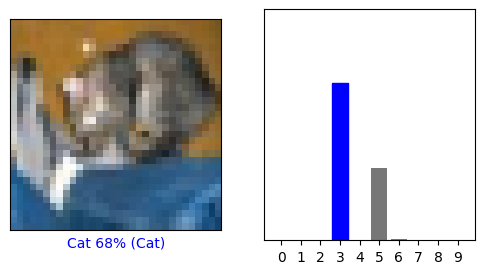

In [144]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

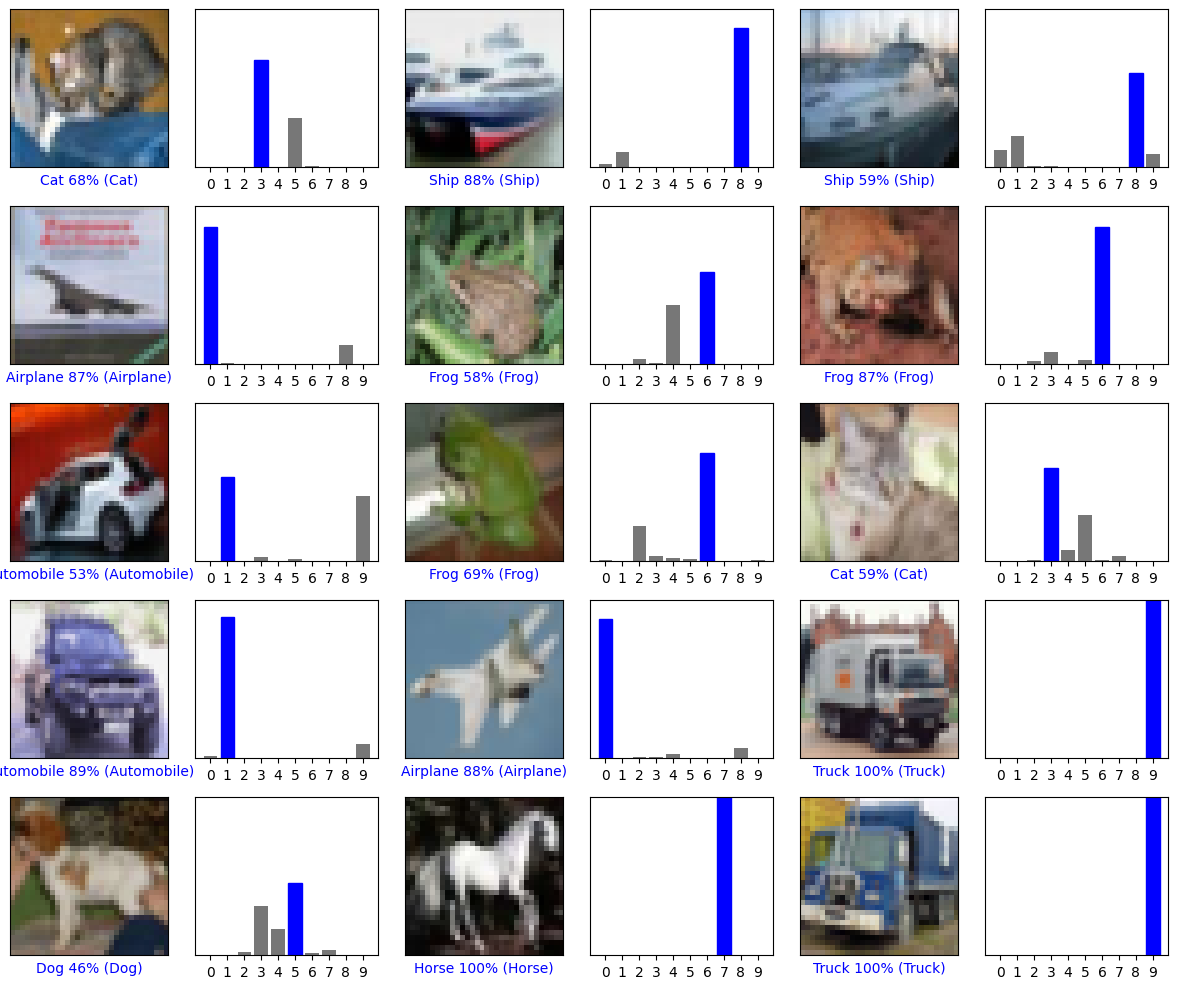

In [146]:
rows=5
cols=3

num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_images(i, predictions[i], test_labels, test_images)
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()